# LotoBot Statistics Algorithms
-------------------------------------

It assumes that the data was already extracted to JSON or CSV (check the README and try the JS in data's folder). 

It approach is about to try to get the break even, which means that it is not required to take profit, but expect to at least to do not lose money & earns/take profit as possible. 

__Obs.:__ IF no module found, remember activate pyenv.

Strategies used to:

__Generate it Numbers__
1. <a href="#Random-Numbers">Random (preventing duplicate bets)</a>
1. <a href="#Cloned-Bets">Cloned Bet (Based on previous results)</a>

__Spray the Budget__
1. <a href="#Big-Bets">Big Bet</a>
1. <a href="#Batch-of-Bets">Batch of Bets</a>
1. <a href="#Max-Mixed-Bets">Max Mixed Bets</a>
1. <a href="#Most-Rolled-Numbers">Most Rolled Numbers</a>

To prove it, it might show up some statistics:

__Histograms__
1. Earnings
1. Numbers right
1. Break even achieved or not

__Pie Chart__
1. Cloned Bets (history, not generated)

# Load Mined Lotery Data

In [1]:
import os
import locale
import random
# import pprint
import datetime
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print('Locale set to:')
locale.setlocale(locale.LC_ALL, 'pt_BR')

Locale set to:


'pt_BR'

In [2]:
def drawns_df_int_rolls():
    global drawns_df
    results = []
    for result in drawns_df.results:
        new_rolls = []
        for roll in result:
            new_rolls.append(int(roll))
        results.append(new_rolls)
    return results

In [3]:
load_data_start_time = datetime.datetime.now()

data_path = 'data'
draws_data_path = data_path+'/drawns.json'

current_folder = os.path.abspath(os.path.dirname('__file__'))
complete_bets_path = os.path.join(current_folder, draws_data_path)

drawns_df = pd.read_json(complete_bets_path)
# drawns_df['results'].apply(lambda x: rolls_to_int(x))
drawns_df

,date,id,results,statistics
0,2003-09-29,1,"[18, 20, 25, 23, 10, 11, 24, 14, 06, 02, 13, 0...","{'rolls': '0,00', 'winners_amount': {'11': '25..."
1,2003-06-10,2,"[23, 15, 05, 04, 12, 16, 20, 06, 11, 19, 24, 0...","{'rolls': '0,00', 'winners_amount': {'11': '47..."
2,2003-10-13,3,"[20, 23, 12, 08, 06, 01, 07, 11, 14, 04, 16, 1...","{'rolls': '0,00', 'winners_amount': {'11': '60..."
3,2003-10-20,4,"[16, 05, 25, 24, 23, 08, 12, 02, 17, 18, 01, 1...","{'rolls': '0,00', 'winners_amount': {'11': '70..."
4,2003-10-27,5,"[15, 13, 20, 02, 11, 24, 09, 16, 04, 23, 25, 1...","{'rolls': '0,00', 'winners_amount': {'11': '86..."
5,2003-03-11,6,"[23, 19, 01, 05, 07, 21, 16, 10, 15, 25, 06, 0...","{'rolls': '0,00', 'winners_amount': {'11': '88..."
6,2003-10-11,7,"[22, 04, 15, 08, 16, 14, 21, 23, 12, 01, 25, 1...","{'rolls': '0,00', 'winners_amount': {'11': '96..."
7,2003-11-17,8,"[19, 16, 18, 09, 13, 08, 05, 25, 17, 10, 06, 1...","{'rolls': '0,00', 'winners_amount': {'11': '92..."
8,2003-11-24,9,"[21, 04, 17, 05, 03, 13, 16, 09, 20, 24, 25, 1...","{'rolls': '0,00', 'winners_amount': {'11': '11..."
9,2003-01-12,10,"[24, 19, 08, 23, 06, 02, 20, 11, 09, 03, 04, 1...","{'rolls': '0,00', 'winners_amount': {'11': '11..."


In [4]:
load_data_end_time = datetime.datetime.now()
time_diff = int(abs(load_data_end_time - load_data_start_time).total_seconds()*1000)
"Data loaded after " + "{:n}".format(time_diff) + " ms"

'Data loaded after 542 ms'

# Settings (config)
---------------

Create the bet rules variables

1. Trials (a list of bets (list of rolls) to prevent duplicate bet)
1. Max rolls per bet: 15 (default), 16, ... 
1. Price for each bet, by amount of rolls (numbers)
1. Possible rolls (numbers): 1 to 25
1. Max Investment per draw
1. Max period investiment (month spend)

In [5]:
# list of bets by type (populate by algorithms forward)
trials = {
    'random': [], #random rolls bets strategy
    'cloned': [], #cloned bets strategy
    'max_mix': [], #max_mix bets strategy
    'inverted': [] #use the random bets filling it not rolled numbers
} 

bet_types = {
    '15': 2, # R$2,00
    '16': 32, # R$ 32,00
    '17': 272, # R$ 272,00
    '18': 1632 # R$ 1.632,00
}

min_investment = 30 # R$ 30,00 is the minimum investiment for online bet
max_investment = 64 # R$ 64,00 per week (R$ 256 per month)
max_period_investment = max_investment * 4 # max month spend
possible_rolls = range(1,26) # 26 to include 25 in the range
min_bet_rolls = 15 # how much roll per bet (change the price)
max_bet_rolls = 18 # how much roll per bet (change the price)
max_total_investment = max_period_investment + bet_types['17'] + bet_types['18'] # add unique bet for expensive
spend_per_strategy = max_total_investment/len(trials.keys())
str_spend_per_strategy = locale.currency(spend_per_strategy, grouping=True, symbol=None)

print('Max Month Spend: R$'+locale.currency(max_total_investment, grouping=True, symbol=None))
print('Max Spend per Strategy: R$'+str_spend_per_strategy)

# Check possible rolls
# for pr in range(len(possible_rolls)):
#     print(possible_rolls[pr])

Max Month Spend: R$2.160,00
Max Spend per Strategy: R$540,00


# Random Numbers

### Prevent Duplicated Bet

In [6]:
def duplicated(bet):
    """This method verify the duplication of received bet in the global trials.

    The global trials are iterate to check if the numbers are present.
    The order is not important, so reorder (sort) numbers to prevent false non-duplicate bet.

    Args:
        bet (list): List of rolls(numbers) in a bet.

    Returns:
        bool: True if it is duplicated, False if not found in early bets.

    Raises:
        AttributeError: no param or None received
        ValueError: not a number received as param or some bet's roll is not a number.

    """
    
    global trials
    duplicated = False
    
    for tt in trials.keys():
        trial_type = trials[tt]
        for trial in trial_type:
            if set(bet) == set(trial):
                duplicated = True
                break
    
    return duplicated

### Prevent History Duplicated Bet

In [7]:
def history_matched(bet):
    """This method verify if there is a match with the received bet in the history drawns.

    The drawns never repeated the same 15 numbers, so it the bet match any, it is burnt.

    Args:
        bet (list): List of rolls(numbers) in a bet.

    Returns:
        bool: True if it is duplicated, False if it was not found in history drawns.

    Raises:
        AttributeError: no param or None received
        ValueError: not a number received as param or some bet's roll is not a number.

    """
    
    global drawns_df
    history_drawns = drawns_df_int_rolls()
    
    for drawn in history_drawns:
        if(set(drawn) == set(bet)): 
            return True
    
    return False

### Generate Random Numbers

In [8]:
def gen_random_rolls_bet(max_bet_rolls=15):
    """This method generate an unique random rolls bet.

    Every bet generated is tested if unique in the trials list.

    Args:
        max_bet_rolls (int): Amount of rolls for the bet, the default is 15 (minimum).

    Returns:
        list: List of rolls as a single bet checked if duplicate or not.

    Raises:
        AttributeError: no param or None received
        ValueError: not a number received as param or some bet's roll is not a number.

    """
    
    global trials
    bet = []

    # Generate BETs while it is not unique in TRIALS LIST
    while True:
        # Generate ROLLs while the BET is not FILLED to it MAX
        while len(bet) < max_bet_rolls:
            # Generate ROLLs while ROLL not unique in the BET
            while True:
                roll = random.randint(1,25)
                if roll not in bet:
                    bet.append(roll)
                    break
            # Generated unique ROLL to the BET
        # Generated a COMPLETE BET, now check if it is duplicated
        if not duplicated(bet) and not history_matched(bet):
            break
    
    trials['random'].append(bet)
    return bet

# Cloned Bets

# Max Mixed Bets

# Most Rolled Numbers

# Big Bets

# Batch of Bets

# Data Statistics

What the data says, a look in the history before start the trials generator

### History Results Exploration - PieChart 

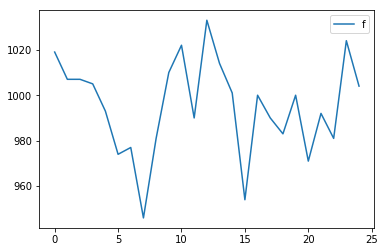

In [9]:
results_series = pd.Series(np.concatenate(drawns_df.results))
rolls_counted = results_series.value_counts().sort_index().rename_axis('x').reset_index(name='f')
rolls_counted.plot()

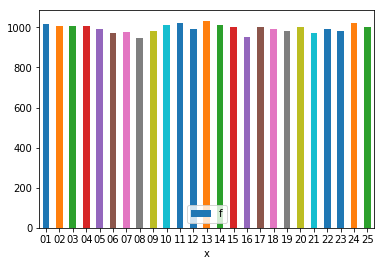

In [10]:
rolls_counted.plot.bar(x='x', y='f', rot=0)

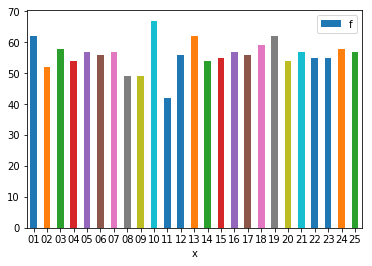

In [11]:
last_drawns = drawns_df[-100:].copy()
last_drawns = last_drawns.reset_index()
last_results_series = pd.Series(np.concatenate(last_drawns.results))
last_rolls_counted = last_results_series.value_counts().sort_index().rename_axis('x').reset_index(name='f')
last_rolls_counted.plot.bar(x='x', y='f', rot=0)

In [12]:
last_rolls_counted.sort_values(by=['f'], ascending=False)[:16]

,x,f
9,10,67
0,01,62
18,19,62
12,13,62
17,18,59
23,24,58
2,03,58
4,05,57
15,16,57
20,21,57


## Most Rolled Numbers

In [13]:
rolls_counted.sort_values(by=['f'], ascending=False)

,x,f
12,13,1033
23,24,1024
10,11,1022
0,01,1019
13,14,1014
9,10,1010
2,03,1007
1,02,1007
3,04,1005
24,25,1004


# Random for Min. Invest.

In [14]:
random_bets = []
min_bets_ammount = min_investment/bet_types['15']

mbai = 0
while mbai < min_bets_ammount:
    bet = gen_random_rolls_bet()
    random_bets.append(bet)
    print(bet)
    mbai = mbai+1

[24, 19, 10, 25, 5, 16, 9, 23, 12, 13, 15, 8, 4, 18, 2]
[14, 17, 5, 24, 12, 18, 9, 25, 22, 10, 2, 19, 20, 7, 16]
[8, 15, 14, 9, 4, 19, 18, 22, 16, 25, 20, 12, 17, 3, 5]
[16, 14, 7, 23, 5, 24, 10, 13, 9, 18, 2, 20, 21, 17, 25]
[13, 17, 16, 19, 25, 24, 10, 4, 3, 6, 18, 7, 23, 15, 9]
[22, 5, 6, 20, 8, 13, 11, 24, 9, 17, 16, 1, 18, 19, 23]
[24, 21, 14, 2, 3, 6, 18, 19, 1, 9, 10, 5, 8, 12, 15]
[4, 6, 3, 5, 7, 15, 18, 22, 14, 24, 21, 11, 25, 20, 1]
[15, 16, 3, 10, 4, 8, 19, 23, 21, 2, 24, 11, 22, 9, 6]
[13, 15, 21, 23, 22, 2, 4, 16, 18, 3, 19, 5, 17, 8, 7]
[9, 5, 6, 3, 24, 19, 15, 13, 10, 25, 21, 2, 14, 23, 8]
[24, 8, 5, 10, 22, 3, 23, 15, 17, 11, 7, 18, 12, 1, 13]
[6, 15, 22, 25, 8, 17, 11, 3, 18, 2, 10, 23, 19, 12, 20]
[19, 6, 4, 21, 25, 9, 17, 10, 14, 3, 8, 24, 15, 5, 18]
[2, 18, 4, 10, 13, 5, 1, 25, 15, 11, 21, 9, 24, 3, 8]


In [15]:
# check if drawns df are ints not strings
# drawns_df_int_rolls()[0][0]

# Bets Historical Profitability

In [16]:
random_bets_set = []

# Iterate generated random bets
for random_bet in random_bets:
    random_bet_set = set(random_bet)
    # Iterate the list of history result
    for result in drawns_df.results:
        # Iterate the rolls of each result to count how much matched
        for roll in result:
            
    
    drawns_df.results

IndentationError: expected an indented block (<ipython-input-16-fc9f49d52f3e>, line 12)

In [ ]:
drawns_df